In [1]:
from keras.layers import Input, Dense
from keras.models import Model

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [30]:
# this is our input placeholder
input_img = Input(shape=(784,))

h_1 = Dense(2*encoding_dim, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(h_1)

h_2 = Dense(2*encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(h_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

In [31]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.5111 - acc: 0.4508 - val_loss: 0.4206 - val_acc: 0.4875
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3898 - acc: 0.4911 - val_loss: 0.3762 - val_acc: 0.4923
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3695 - acc: 0.4938 - val_loss: 0.3625 - val_acc: 0.4969
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3557 - acc: 0.4968 - val_loss: 0.3536 - val_acc: 0.4915
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3443 - acc: 0.4989 - val_loss: 0.3437 - val_acc: 0.5013
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3353 - acc: 0.5009 - val_loss: 0.3341 - val_acc: 0.4972 - loss: 0.3356 - 
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3295 - acc: 0.5018 - val_los

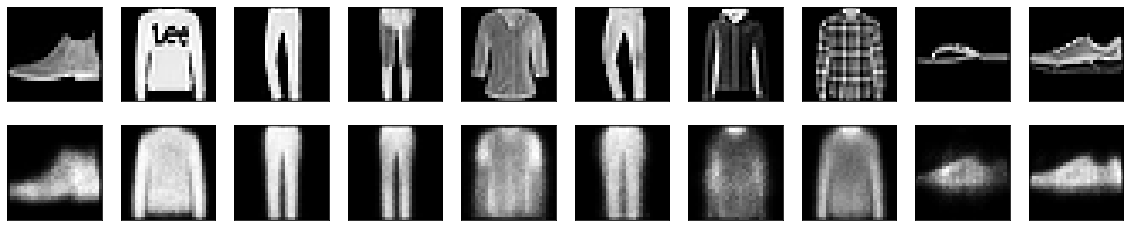

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
history.history

{'val_loss': [0.42062265129089355,
  0.37616208572387694,
  0.3624533597946167,
  0.35355595054626465,
  0.3437323755264282,
  0.3340764965057373,
  0.32983028106689455,
  0.326070866060257,
  0.32417631368637084,
  0.32060394296646116],
 'val_acc': [0.487482147026062,
  0.49231007957458495,
  0.49687027349472046,
  0.49150063991546633,
  0.5013103213310242,
  0.4971890263557434,
  0.5023257696151734,
  0.49864757347106936,
  0.5028547193527222,
  0.49983342056274416],
 'loss': [0.5110618733723958,
  0.3898163833618164,
  0.3695318472703298,
  0.3557217173099518,
  0.3443246954758962,
  0.3352988567193349,
  0.32954789894421893,
  0.32569337566693624,
  0.32230936179161074,
  0.3200793371359507],
 'acc': [0.45080597605705264,
  0.49109929644266764,
  0.4938041475613912,
  0.49676214335759483,
  0.49894011634190877,
  0.5008555293401082,
  0.5018352460384369,
  0.5024012137095133,
  0.5028299133936565,
  0.50319793993632]}

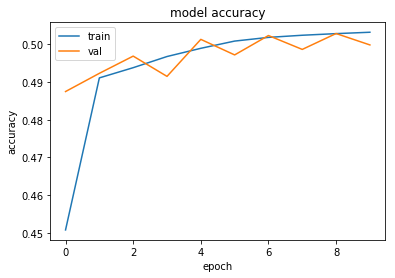

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

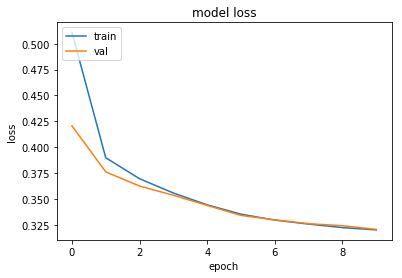

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
[test_loss, test_acc] = autoencoder.evaluate(x_test,x_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 92us/step
Evaluation result on Test Data : Loss = 0.3206039443016052, accuracy = 0.49983342075347903
